<a href="https://colab.research.google.com/github/OIEIEIO/Q-bits/blob/main/Grover%E2%80%99s_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

Grover’s algorithm

---



In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit-ibm-runtime

In [ ]:
!pip install pylatexenc

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Save your credentials on disk.
QiskitRuntimeService.save_account(channel='ibm_quantum', token='use you IBM quantum API token')

service = QiskitRuntimeService()

In [4]:
import random
from qiskit.quantum_info import Statevector

secret = random.randint(0,7)  # the owner is randomly picked
secret_string = format(secret, '03b')  # format the owner in 3-bit string
oracle = Statevector.from_label(secret_string)  # let the oracle know the owner

In [5]:
from qiskit.algorithms import AmplificationProblem

problem = AmplificationProblem(oracle, is_good_state=secret_string)

In [6]:
from qiskit.algorithms import Grover

grover_circuits = []
for iteration in range(1,3):
    grover = Grover(iterations=iteration)
    circuit = grover.construct_circuit(problem)
    circuit.measure_all()
    grover_circuits.append(circuit)

In [ ]:
# With 1 iteration
grover_circuits[0].draw()

In [ ]:
# With 2 iterations
grover_circuits[1].draw()



---


Connect to the Qiskit Runtime service

---



In [20]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

In [23]:
import random
from qiskit.quantum_info import Statevector

secret = random.randint(0,7)  # the owner is randomly picked
secret_string = format(secret, '03b')  # format the owner in 3-bit string
oracle = Statevector.from_label(secret_string)  # let the oracle know the owner

In [24]:
from qiskit.algorithms import AmplificationProblem

problem = AmplificationProblem(oracle, is_good_state=secret_string)

In [25]:
from qiskit.algorithms import Grover

grover_circuits = []
for iteration in range(1,3):
    grover = Grover(iterations=iteration)
    circuit = grover.construct_circuit(problem)
    circuit.measure_all()
    grover_circuits.append(circuit)

In [ ]:
options={ "backend": "ibmq_qasm_simulator" }) as sampler:

In [28]:
from qiskit_ibm_runtime import Sampler
service = QiskitRuntimeService()
with Sampler(circuits=grover_circuits, options = { "backend": "ibmq_qasm_simulator" }) as sampler:
    result = sampler(circuits=[0,1], shots=1000)
    print(result)

SamplerResult(quasi_dists=[{'010': 0.017, '101': 0.032, '001': 0.032, '100': 0.025, '110': 0.031, '011': 0.8, '000': 0.03, '111': 0.033}, {'010': 0.003, '000': 0.003, '111': 0.006, '011': 0.953, '001': 0.012, '101': 0.007, '110': 0.008, '100': 0.008}], metadata=[{'header_metadata': {}, 'shots': 1000}, {'header_metadata': {}, 'shots': 1000}])


As you can see, the quantum computer returned '011' as the answer with highest probability.
And the results with 2 iterations have higher probability than the results with 1 iteration.


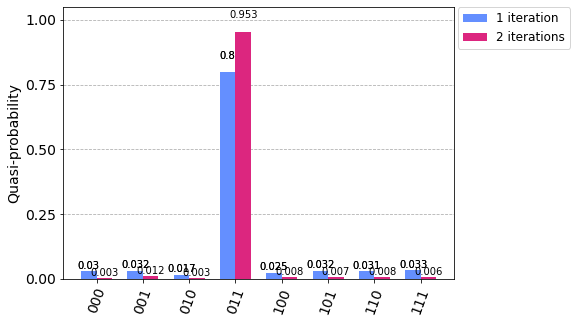

In [29]:
from qiskit.tools.visualization import plot_histogram

# Extract bit string with highest probability from results as the answer
result_dict = result.quasi_dists[1]
answer = max(result_dict, key=result_dict.get)
print(f"As you can see, the quantum computer returned '{answer}' as the answer with highest probability.\n"
       "And the results with 2 iterations have higher probability than the results with 1 iteration."
)

# Plot the results
plot_histogram(result.quasi_dists, legend=['1 iteration', '2 iterations'])

In [30]:
# Print the result and the correct answer.
print(f"Quantum answer: {answer}")
print(f"Correct answer: {secret_string}")
print('Success!' if answer == secret_string else 'Failure!')

Quantum answer: 011
Correct answer: 011
Success!


In [31]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.version.get_version_info()

'0.6.2'

In [32]:
from qiskit.tools.jupyter import *

%qiskit_version_table
%qiskit_copyright